<a href="https://colab.research.google.com/github/sankeawthong/Project-1-Lita-Chatbot/blob/main/Hybrid%20LR-RNN%20for%2010%20class%20classifications%20based%20on%20UNSW-NB15%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Hybrid LR-RNN for 10 class classifications based on UNSW-NB15 dataset**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import np_utils
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Load dataset
dataset = pd.read_csv("dataset_P2.2.csv")
dataset.isnull().sum()

id                   0
dur                  0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
Class                0
dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 41 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   spkts              175341 non-null  int64  
 3   dpkts              175341 non-null  int64  
 4   sbytes             175341 non-null  int64  
 5   dbytes             175341 non-null  int64  
 6   rate               175341 non-null  float64
 7   sttl               175341 non-null  int64  
 8   dttl               175341 non-null  int64  
 9   sload              175341 non-null  float64
 10  dload              175341 non-null  float64
 11  sloss              175341 non-null  int64  
 12  dloss              175341 non-null  int64  
 13  sinpkt             175341 non-null  float64
 14  dinpkt             175341 non-null  float64
 15  sjit               175341 non-null  float64
 16  dj

In [7]:
dataset["Class"].unique()

array([0, 2, 1, 5, 8, 7, 4, 3, 9, 6])

In [8]:
# Data preprocessing
encoder = LabelEncoder()
y = encoder.fit_transform(dataset['Class'])
y = np_utils.to_categorical(y, num_classes=10)
X = dataset.drop(['Class'],axis=1)
X=X.values
print(X.shape)
print(y.shape)

(175341, 40)
(175341, 10)


In [9]:
# Data preprocessing
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [10]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### **Hybrid combination of LR-RNN for 10 class classifications**

In [12]:
# Hybrid LR-CNN model
model_lr = LogisticRegression(random_state=0)
model_lr.fit(X_train, np.argmax(y_train, axis=1)) # modify y_train to 1D array

X_train_cnn = X_train.reshape(X_train.shape[0], -1)
X_test_cnn = X_test.reshape(X_test.shape[0], -1)

model_cnn = Sequential()
model_cnn.add(Dense(128, activation='relu', input_shape=(X_train_cnn.shape[1],)))
model_cnn.add(Dense(10, activation='softmax'))
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_cnn.fit(X_train_cnn, y_train, batch_size=64, epochs=10, verbose=1, validation_data=(X_test_cnn, y_test))

# Combine models
y_pred_lr = model_lr.predict(X_test)
y_pred_lr = np.reshape(y_pred_lr, (y_pred_lr.shape[0], 1)) # add this line
y_pred_cnn = model_cnn.predict(X_test_cnn)
y_pred = (y_pred_lr + y_pred_cnn) / 2
y_pred = np.argmax(y_pred, axis=1)

# Evaluation metrics
print(classification_report(np.argmax(y_test, axis=1), y_pred))
print(confusion_matrix(np.argmax(y_test, axis=1), y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Epoch 1/10
7000/7000 [==============================] - 16s 2ms/step - loss: 4188153.7500 - accuracy: 0.2274 - val_loss: 3907470.5000 - val_accuracy: 0.2253
Epoch 2/10
7000/7000 [==============================] - 14s 2ms/step - loss: 2757964.0000 - accuracy: 0.2614 - val_loss: 1992898.3750 - val_accuracy: 0.2965
Epoch 3/10
7000/7000 [==============================] - 14s 2ms/step - loss: 1817998.6250 - accuracy: 0.2629 - val_loss: 1371100.0000 - val_accuracy: 0.2950
Epoch 4/10
7000/7000 [==============================] - 13s 2ms/step - loss: 1063637.1250 - accuracy: 0.2723 - val_loss: 472027.9375 - val_accuracy: 0.2589
Epoch 5/10
7000/7000 [==============================] - 14s 2ms/step - loss: 537105.0625 - accuracy: 0.2788 - val_loss: 344297.0312 - val_accuracy: 0.2736
Epoch 6/10
7000/7000 [==============================] - 13s 2ms/step - loss: 131033.8438 - accuracy: 0.2096 - val_loss: 308.2327 - val_accuracy: 0.1486
Epoch 7/10
7000/7000 [==============================] - 14s 2ms/st

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def conf_mat(d1,d2):
  cm = confusion_matrix(d1, d2)
  plt.figure(figsize=(8,6.5))
  ax = sns.heatmap(cm,  fmt='2', annot=True, cmap='YlGnBu')
  sns.set(font_scale=1)
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values\n');
  ax.xaxis.set_ticklabels(['Normal','Analysis','Backdoor','DoS','Exploits','Fuzzers','Generic','Reconnaissance','Shellcode','Worms'])
  ax.yaxis.set_ticklabels(['Normal','Analysis','Backdoor','DoS','Exploits','Fuzzers','Generic','Reconnaissance','Shellcode','Worms'])

  plt.xticks(rotation=45)  # Add this line to rotate the x-axis labels by 45 degrees
  plt.yticks(rotation=45)  # Add this line to rotate the x-axis labels by 45 degrees
  
  plt.tight_layout()
  # plt.savefig("F1.eps", format = 'eps')
  plt.show()

Confusion Matrix of Hybrid LR-RNN Model


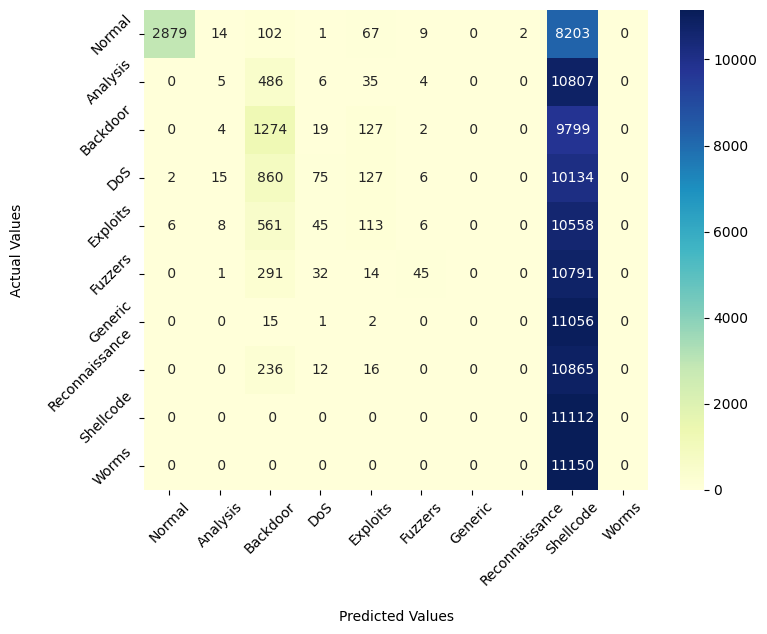

In [14]:
print("Confusion Matrix of Hybrid LR-RNN Model") 
conf_mat(np.argmax(y_test, axis=1), y_pred)

In [15]:
report = classification_report(np.argmax(y_test, axis=1), y_pred, output_dict=True)
detection_rates = {}
for cls in range(10):
    detection_rates[encoder.inverse_transform([cls])[0]] = report[str(cls)]['recall']
print("Detection rates:", detection_rates)

Detection rates: {0: 0.25529839496319945, 1: 0.00044080049369655297, 2: 0.1134966592427617, 3: 0.006685087797486407, 4: 0.010002655572275825, 5: 0.004027206013960981, 6: 0.0, 7: 0.0, 8: 1.0, 9: 0.0}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
